## Imports

In [1]:
import datetime
import pandas as pd
import numpy as np
import pickle
import sys
sys.path.append('../utils/')
from Read_data import read_data
from evaluation import evaluation_class
import ourPreprocessor
from sklearn.metrics import make_scorer
from sklearn.metrics import log_loss
from sklearn.externals import joblib
    
from keras.wrappers.scikit_learn import KerasClassifier
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split
from keras.utils import np_utils

from sklearn.preprocessing import MinMaxScaler
from keras.models import load_model

from keras.layers import Dense, Dropout, LSTM, Embedding, Input, RepeatVector
from keras.optimizers import SGD
from sklearn.preprocessing import LabelEncoder 
from keras.utils import to_categorical

/home/ramona/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.
/home/ramona/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/ramona/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: ImportWarning: can't resolve package from __spec__ or __package__, falling back on __name__ and __path__
  return f(*args, **kwds)
/home/ramona/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: ImportWarning: can't resolve package from __spec__ or __package__, falling back on __name__ and __path__
  return f(*args, **kwds)


## Preparing the data

Loading data


In [2]:
# Loading data
pipelinetime = '18-05-30-17-11'
X_train, Y_train, X_test, Y_test, Y_train_cateogorial, Y_test_cateogorial = read_data(pipelinetime, stack = True, stage2=False)
print('X_train:', X_train.shape,  'Y_test:', Y_test.shape, 'X_test:',X_test.shape, 'Y_train:',Y_train.shape)

Y_test_stage2_id = pd.read_pickle('../utils/stage2_data/stage2test_classes.sav')['ID'].values
print(Y_test.shape)
X_test = np.take(X_test,(list(Y_test_stage2_id-1)), axis =0)
print(X_test.shape)
X = np.vstack((X_train,  X_test))
Y = np.hstack((Y_train,  Y_test))
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=125)





#Oversampling 
from imblearn.over_sampling import ADASYN
X_resampled, y_resampled = ADASYN(ratio='auto').fit_sample(X_train,Y_train)

#Normalize
normalizer = MinMaxScaler()
X_resampled = normalizer.fit_transform(X_resampled)
X_test = normalizer.transform(X_test)

X_train: (3683, 110) Y_test: (125,) X_test: (986, 110) Y_train: (3683,)
(125,)
(125, 110)


In [3]:
encoder = LabelEncoder()
encoder.fit(y_resampled .astype(str))
encoded_y = encoder.transform(y_resampled)
Y_train_cateogorial = to_categorical(encoded_y)

## Training the Model and Predicting the Ytest

In [39]:
modeltime = datetime.datetime.now().strftime("%y-%m-%d-%H-%M")
def baseline_model():
    model = Sequential()
    model.add(Dense(12, input_dim=110, activation='relu'))
    model.add(Dense(12, activation='relu'))
    model.add(Dense(9, activation="softmax"))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

model = baseline_model()
model.summary()


estimator=model.fit(X_resampled,Y_train_cateogorial, epochs=20, batch_size=64, validation_split=0.1)

/home/ramona/anaconda3/lib/python3.6/site-packages/tensorflow/python/util/tf_inspect.py:55: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() or inspect.getfullargspec()
  if d.decorator_argspec is not None), _inspect.getargspec(target))
/home/ramona/anaconda3/lib/python3.6/site-packages/tensorflow/python/util/tf_inspect.py:55: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() or inspect.getfullargspec()
  if d.decorator_argspec is not None), _inspect.getargspec(target))
/home/ramona/anaconda3/lib/python3.6/site-packages/tensorflow/python/util/tf_inspect.py:55: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() or inspect.getfullargspec()
  if d.decorator_argspec is not None), _inspect.getargspec(target))
/home/ramona/anaconda3/lib/python3.6/site-packages/tensorflow/python/util/tf_inspect.py:55: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() or inspect.getfullargspe

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_17 (Dense)             (None, 12)                1332      
_________________________________________________________________
dense_18 (Dense)             (None, 12)                156       
_________________________________________________________________
dense_19 (Dense)             (None, 9)                 117       
Total params: 1,605
Trainable params: 1,605
Non-trainable params: 0
_________________________________________________________________


/home/ramona/anaconda3/lib/python3.6/site-packages/tensorflow/python/util/tf_inspect.py:55: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() or inspect.getfullargspec()
  if d.decorator_argspec is not None), _inspect.getargspec(target))
/home/ramona/anaconda3/lib/python3.6/site-packages/tensorflow/python/util/tf_inspect.py:55: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() or inspect.getfullargspec()
  if d.decorator_argspec is not None), _inspect.getargspec(target))
/home/ramona/anaconda3/lib/python3.6/site-packages/tensorflow/python/util/tf_inspect.py:55: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() or inspect.getfullargspec()
  if d.decorator_argspec is not None), _inspect.getargspec(target))
/home/ramona/anaconda3/lib/python3.6/site-packages/tensorflow/python/util/tf_inspect.py:55: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() or inspect.getfullargspe

Train on 8278 samples, validate on 920 samples
Epoch 1/20
8278/8278 [==============================] - 1s 104us/step - loss: 2.1554 - acc: 0.1569 - val_loss: 2.7346 - val_acc: 0.0000e+00
Epoch 2/20
8278/8278 [==============================] - 0s 40us/step - loss: 2.0434 - acc: 0.2444 - val_loss: 3.6969 - val_acc: 0.0000e+00
Epoch 3/20
8278/8278 [==============================] - 0s 40us/step - loss: 1.9013 - acc: 0.3462 - val_loss: 4.2245 - val_acc: 0.0000e+00
Epoch 4/20
8278/8278 [==============================] - 0s 39us/step - loss: 1.7568 - acc: 0.3738 - val_loss: 4.2522 - val_acc: 0.0000e+00
Epoch 5/20
8278/8278 [==============================] - 0s 40us/step - loss: 1.6487 - acc: 0.3968 - val_loss: 4.0792 - val_acc: 0.0000e+00
Epoch 6/20
8278/8278 [==============================] - 0s 39us/step - loss: 1.5690 - acc: 0.4255 - val_loss: 3.9988 - val_acc: 0.0000e+00
Epoch 7/20
8278/8278 [==============================] - 0s 38us/step - loss: 1.5118 - acc: 0.4532 - val_loss: 3.9930 -

In [40]:
model.model.save('models/keras_'+modeltime+'.h5')
pred = model.predict_proba(X_test)

In [41]:
submission = pd.DataFrame(pred, columns=['class'+str(c+1) for c in range(9)])
if pred.shape[0] >200:
    submission['ID'] = np.arange(1,987)
else: 
    submission['ID'] = np.arange(1,126)
submission.to_csv('submissions/submission_keras_' + pipelinetime+'_'+ modeltime +'.csv', index=False)

# Weighted average and Leak 

In [42]:
modeltime

'18-06-04-16-19'

In [43]:
#Loading submission with recent time
submission_filled = pd.read_csv('submissions/submission_keras_'+pipelinetime+'_'+ modeltime+'.csv')
submission_filled = submission_filled.drop('ID', axis = 1).values
submission_all_1_over_9 = pd.read_csv('submissions/submission_sample_fullwith01111.csv')
submission_all_1_over_9= submission_all_1_over_9.drop('ID', axis = 1).values[:125,:]

#weighted average
weighting = (6,4)
submission_wighted_average = (submission_filled*weighting[0] +submission_all_1_over_9*weighting[1])/10
submission_wighted_average

# transforming the weighted average into the right format and save it in submissions
submission_wighted_average = pd.DataFrame(submission_wighted_average, columns=['class'+str(c+1) for c in range(9)])
submission_wighted_average['ID'] = np.arange(1,126)
submission_wighted_average.to_csv('submissions/submission_keras_wighted_average'+str(weighting) + pipelinetime+'_'+ modeltime +'.csv', index=False)

# evaluation 

In [44]:
#weighting = (3,7)
preds = pd.read_csv('submissions/submission_keras_wighted_average'+str(weighting) + pipelinetime +'_'+ modeltime+'.csv')\
           .drop('ID',axis=1)\
           .values
print(preds)
if preds.shape[0] > 200:
    Y_test_stage2_id = pd.read_pickle('../utils/stage2_data/stage2test_classes.sav')['ID'].values
    preds = np.take(preds,(list(Y_test_stage2_id-1)), axis =0)  

[[0.07785543 0.24482404 0.0496887  ... 0.24955374 0.08611539 0.07802212]
 [0.07103291 0.0455948  0.14477116 ... 0.04564754 0.04451984 0.04448518]
 [0.18255748 0.04894172 0.04886854 ... 0.04731944 0.0449149  0.0450479 ]
 ...
 [0.11896734 0.12233406 0.09394944 ... 0.11997722 0.0572243  0.05861889]
 [0.04916726 0.31406656 0.04491806 ... 0.34002448 0.05275311 0.04477002]
 [0.13773393 0.12862145 0.06774388 ... 0.12030498 0.05964161 0.05934855]]


/home/ramona/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Accuracy: 0.416 Log loss: 1.5862111016496163 F1 micro: 0.416 F1 macro: 0.3621337579333872


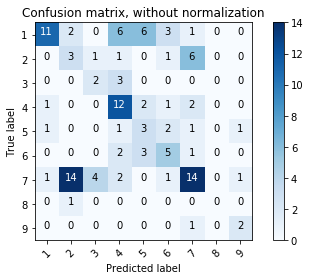

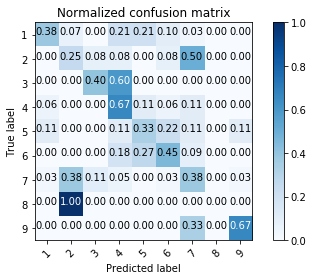

one row with the evaluation data is appended at /mnt/4_TB_HD/ramona/develop/results.csv


In [45]:
ev = evaluation_class(1000,y_pred=preds, Y_test=Y_test)
ev.entire_evaluation()